In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec

base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')

In [6]:
#Jacob's alignment comparison data
aln_comparisons_fname = base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/03_info_content_res_clean.txt')
aln_comparisons = pd.read_table(aln_comparisons_fname, header=None)
aln_comparisons.columns = ['metric','value','og','aln_type','metric_type','og_ref_full']

#Conservation data
scores_mapped = pd.read_table(base_dir + os.sep + os.path.normpath('Output/Matrices/Scores_Mapped.tsv'), index_col = 0)
params_to_plot_mapped = ['Mean(Conservation Rate) [ALL]', 'CV(Type Conservation Rate) [ALL]', 'Mean(Type Conservation Rate) [ALL]', 'CV(Conservation Rate) [ALL]']
scores_mapped_subset = scores_mapped.loc[:,params_to_plot_mapped]

In [18]:
cols_to_keep = ['value','og','og_ref']
metrics = ['saturation', 'treeness']

aln_comparisons_dict = {}
for metric in metrics:
    aln_comp_metric_full = aln_comparisons[aln_comparisons['metric']==metric].copy()
    aln_comp_metric_full['og_ref'] = [og_ref_full.split('/')[1].split('.')[0] for og_ref_full in aln_comp_metric_full['og_ref_full']]


    aln_comp_metric_seq = aln_comp_metric_full.loc[(aln_comp_metric_full['aln_type']=='seq'), cols_to_keep]
    aln_comp_metric_struct = aln_comp_metric_full.loc[(aln_comp_metric_full['aln_type']=='struct'), cols_to_keep]
    aln_comp_metric = aln_comp_metric_seq.merge(aln_comp_metric_struct, on='og_ref',how='outer', suffixes=('_seq','_struct'))
    
    og_ref_new = []
    for og_ref_old in aln_comp_metric['og_ref']:
        og_ref_old_sp = og_ref_old.split('__')
        og_ref_new.append(og_ref_old_sp[0] + '_REF_' + og_ref_old_sp[1])
    
    aln_comp_metric['og_ref_new'] = og_ref_new
    
    aln_comparisons_dict[metric] = aln_comp_metric.merge(scores_mapped_subset, how = 'outer', left_on='og_ref_new', right_index=True)


In [19]:
aln_comparisons_dict['treeness'].to_csv(base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/jacobs_analysis_treeness.csv'))
aln_comparisons_dict['saturation'].to_csv(base_dir + os.sep + os.path.normpath('msas/sequence/jacobs_analysis/jacobs_analysis_saturation.csv'))

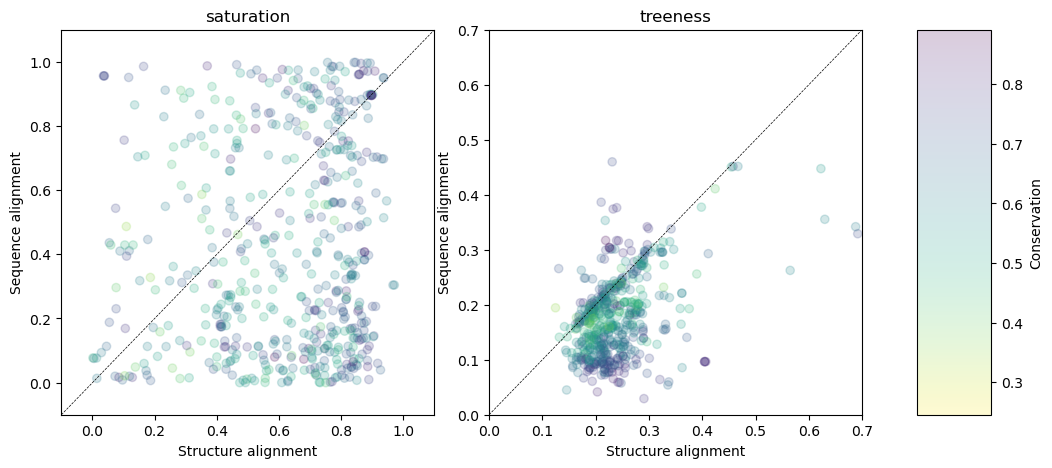

In [39]:
fig = plt.figure(figsize=(12, 5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[5,5,1]) 
#fig,axarr = plt.subplots(1,3, figsize = (9,4), width_ratios = [5,5,1])

ranges = {'saturation': [-0.1,1.1],
          'treeness': [0,0.7]}

vmin = min(scores_mapped_subset['Mean(Conservation Rate) [ALL]'])
vmax = max(scores_mapped_subset['Mean(Conservation Rate) [ALL]'])

for jj, metric in enumerate(metrics): 
    ax = plt.subplot(gs[jj])
    data_to_plot = aln_comparisons_dict[metric]
    data_plt = ax.scatter(data_to_plot['value_struct'], data_to_plot['value_seq'], alpha = 0.2, c = data_to_plot['Mean(Conservation Rate) [ALL]'], cmap = 'viridis_r', vmin = vmin, vmax = vmax)
    ax.set_title(metric)
    ax.set_xlabel('Structure alignment')
    ax.set_ylabel('Sequence alignment')
    ax.plot(ranges[metric],ranges[metric],color='k',linestyle = '--', linewidth = 0.5)
    ax.set_xlim(ranges[metric])
    ax.set_ylim(ranges[metric])


ax = plt.subplot(gs[2])
plt.colorbar(data_plt, cax=ax, label='Conservation')
    

In [25]:
list(aln_comp_metric_full['og_ref_full'])[0]

'fasta_renamed_seq_filt/OG1004__Scer_AF-P15938-F1-model_v2.seq_filt.fasta'

In [26]:
og_ref_full = 'fasta_renamed_seq_filt/OG1004__Scer_AF-P15938-F1-model_v2.seq_filt.fasta'


'OG1004__Scer_AF-P15938-F1-model_v2'

C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,value_seq,og_seq,og_ref,value_struct,og_struct
0,0.1940,OG1004,OG1004__Scer_AF-P15938-F1-model_v2,0.1940,OG1004
1,0.2031,OG1004,OG1004__Scer_AF-P20095-F1-model_v2,0.2031,OG1004
2,0.2001,OG1004,OG1004__Scer_AF-P24384-F1-model_v2,0.2001,OG1004
3,0.6598,OG1004,OG1004__Scer_AF-P40459-F1-model_v2,0.6598,OG1004
4,0.1853,OG1004,OG1004__Scer_AF-P53131-F1-model_v2,0.1853,OG1004
...,...,...,...,...,...
521,0.2874,OG5327,OG5327__Scer_AF-P43635-F1-model_v2,0.2874,OG5327
522,0.9746,OG5404,OG5404__Scer_AF-P06115-F1-model_v2,0.9746,OG5404
523,0.5896,OG5441,OG5441__Scer_AF-P00724-F1-model_v2,0.5896,OG5441
524,0.8135,OG5490,OG5490__Scer_AF-P32340-F1-model_v2,0.8135,OG5490


In [16]:
aln_comparisons.loc[aln_comparisons_grouped.groups['saturation'],:]

,0,1,2,3,4,5
14,saturation,0.1940,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P15938-...
30,saturation,0.2031,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P20095-...
46,saturation,0.2001,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P24384-...
62,saturation,0.6598,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P40459-...
78,saturation,0.1853,OG1004,seq,tree_and_aln,fasta_renamed_seq_filt/OG1004__Scer_AF-P53131-...
...,...,...,...,...,...,...
16866,saturation,0.7904,OG5327,struct,tree_and_aln,fasta_renamed_struct_filt/OG5327__Scer_AF-P436...
16882,saturation,0.6617,OG5404,struct,tree_and_aln,fasta_renamed_struct_filt/OG5404__Scer_AF-P061...
16898,saturation,0.6987,OG5441,struct,tree_and_aln,fasta_renamed_struct_filt/OG5441__Scer_AF-P007...
16914,saturation,0.6546,OG5490,struct,tree_and_aln,fasta_renamed_struct_filt/OG5490__Scer_AF-P323...


In [13]:
struct_seq_alnstruct_seq_aln_comparisons_grouped.groups['saturation']

Int64Index([   14,    30,    46,    62,    78,    94,   110,   126,   142,
              158,
            ...
            16786, 16802, 16818, 16834, 16850, 16866, 16882, 16898, 16914,
            16930],
           dtype='int64', length=1052)